In [46]:
%reset

In [5]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3" 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import units
from tensorflow.keras.optimizers import Adam
import os
from glob import glob
import shutil
import time
from IPython.display import clear_output
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import shutil
import PIL
from tensorflow.keras import layers
import pickle
AUTOTUNE = tf.data.AUTOTUNE

In [8]:
batch_size = 32
img_height = 180
img_width = 180
dtrain = tf.keras.utils.image_dataset_from_directory(
  './chihuahua-muffinTrain/',
  validation_split=0.2,
  seed=123,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

dtest = tf.keras.utils.image_dataset_from_directory(
  './chihuahua-muffinTrain/',
  validation_split=0.2,
  seed=123,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [9]:
class_names = dtrain.class_names
print(class_names)
dtrain = dtrain.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
dtest = dtest.cache().prefetch(buffer_size=AUTOTUNE)

['chihuahua', 'muffin']


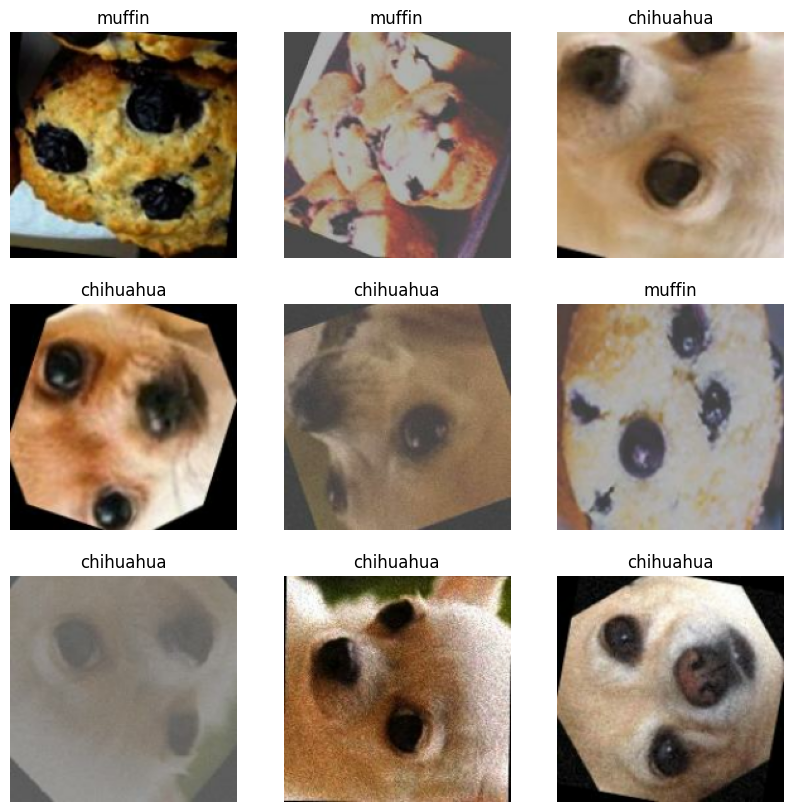

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in dtrain.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
classes=len(class_names)
opt=tf.keras.optimizers.Adam(0.001)
model=tf.keras.models.Sequential()
model.add(layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)))
model.add(layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))
model.add(layers.Conv2D(16,3,padding="same",activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32,3,padding="same",activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,3,padding="same",activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(classes))

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(dtrain,validation_data=dtest,epochs=10)

Epoch 1/10
50/50 [==============================] - 24s 415ms/step - loss: 0.6885 - accuracy: 0.5425 - val_loss: 0.6522 - val_accuracy: 0.6725
Epoch 2/10
50/50 [==============================] - 20s 405ms/step - loss: 0.6223 - accuracy: 0.6725 - val_loss: 0.6185 - val_accuracy: 0.6150
Epoch 3/10
50/50 [==============================] - 21s 425ms/step - loss: 0.5228 - accuracy: 0.7450 - val_loss: 0.5989 - val_accuracy: 0.7000
Epoch 4/10
50/50 [==============================] - 20s 398ms/step - loss: 0.4674 - accuracy: 0.7806 - val_loss: 0.4076 - val_accuracy: 0.8250
Epoch 5/10
50/50 [==============================] - 20s 402ms/step - loss: 0.4189 - accuracy: 0.8119 - val_loss: 0.3581 - val_accuracy: 0.8475
Epoch 6/10
50/50 [==============================] - 20s 401ms/step - loss: 0.3487 - accuracy: 0.8369 - val_loss: 0.3355 - val_accuracy: 0.8500
Epoch 7/10
50/50 [==============================] - 20s 397ms/step - loss: 0.2931 - accuracy: 0.8750 - val_loss: 0.2910 - val_accuracy: 0.8600

1/1 [==============================] - 0s 24ms/step
This image used to be ./test 
but most likely belongs to muffin 
with a 86.06 percent confidence.


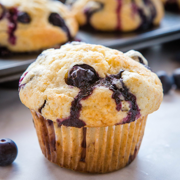

In [19]:
from random import random
#img_paths = glob('./chihuahua-muffin/*/*')
img_paths = glob('./test/*.jpg')
ind=int(random()*len(img_paths))
img = tf.keras.utils.load_img(
    img_paths[ind], target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image used to be {} \nbut most likely belongs to {} \nwith a {:.2f} percent confidence."
    .format(img_paths[ind].split("\\")[-2],class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(img_paths[ind]).resize((180,180))

In [6]:
model=tf.keras.models.load_model(".\chihuahua-muffin-classifier")